In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install statsmodels

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


In [40]:
datos = "all_stocks_5yr.csv"
df = pd.read_csv(datos)
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [23]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo

# For time stamps
from datetime import datetime

In [44]:
#Filtrado de el dataset por la Acción de AMAZON
df_filtrado = df[df['Name'] == 'AMZN']

In [45]:
df_filtrado.head()

,date,open,high,low,close,volume,Name
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


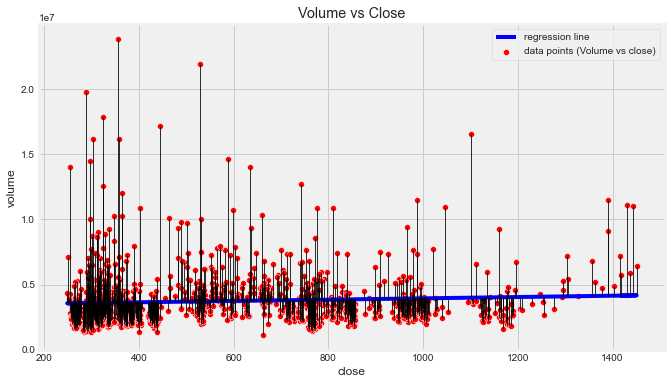

In [47]:
# Crear el gráfico de dispersión con puntos de datos en rojo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='close', y='volume', data=df_filtrado, color='red', label='data points (Volume vs close)')

# Ajustar la línea de tendencia (regresión lineal)
slope, intercept = np.polyfit(df_filtrado['close'], df_filtrado['volume'], 1)
plt.plot(df_filtrado['close'], slope * df_filtrado['close'] + intercept, color='blue', label='regression line')

# Dibujar líneas que conectan cada punto con la línea de tendencia
for index, row in df_filtrado.iterrows():
    x = row['close']
    y_actual = row['volume']
    y_estimado = slope * x + intercept
    plt.plot([x, x], [y_actual, y_estimado], color='black', linewidth=0.8)

# Etiquetas y título
plt.xlabel('close')
plt.ylabel('volume')
plt.title('Volume vs Close')
plt.legend()

# Mostrar el gráfico
plt.show()

In [50]:
#importar stats
from scipy import stats

In [61]:
import statsmodels.api as sm

In [68]:
df_filtrado['open'] = pd.to_numeric(df_filtrado['open'], errors='coerce')
df_filtrado['open^2'] = df_filtrado['open'] ** 2

df_filtrado.dropna(subset=['open', 'open^2'], inplace=True)

X = df_filtrado[['open', 'open^2']]
y = df_filtrado['volume']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                 volume   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.450
Date:                Mon, 28 Aug 2023   Prob (F-statistic):             0.0320
Time:                        11:06:08   Log-Likelihood:                -20150.
No. Observations:                1259   AIC:                         4.031e+04
Df Residuals:                    1256   BIC:                         4.032e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.714e+06   3.17e+05     11.715      0.0

C:\Users\erikl\AppData\Local\Temp/ipykernel_27328/3165791626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['open'] = pd.to_numeric(df_filtrado['open'], errors='coerce')
C:\Users\erikl\AppData\Local\Temp/ipykernel_27328/3165791626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['open^2'] = df_filtrado['open'] ** 2
c:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

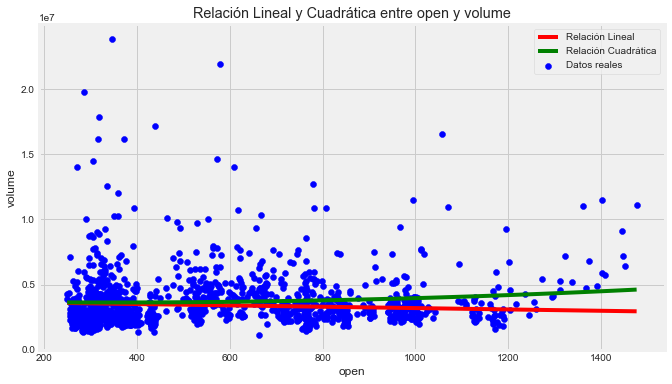

In [70]:
# Definir las variables independientes y dependientes
volume = df_filtrado['volume']
open = df_filtrado['open']
open_squared = df_filtrado['open^2']

# Crear un rango de valores de "open" para la gráfica
open_range = np.linspace(open.min(), open.max(), 100)

# Calcular las predicciones para las relaciones lineal y cuadrática
volume_pred_linear = b0 + b1 * open_range
volume_pred_quadratic = b0 + b1 * open_range + b2 * open_range**2

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.scatter(open, volume, label='Datos reales', color='blue')
plt.plot(open_range, volume_pred_linear, label='Relación Lineal', color='red')
plt.plot(open_range, volume_pred_quadratic, label='Relación Cuadrática', color='green')

# Etiquetas y título
plt.xlabel('open')
plt.ylabel('volume')
plt.title('Relación Lineal y Cuadrática entre open y volume')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()